In [1]:
import numpy as np
import matplotlib.pyplot as plt

**The Crucial Role of Activation Functions**

One of the most critical components of a neural network is the **Activation Function**. It is the secret sauce that allows us to reach *non-linearity*.

Suppose we want to fit a simple neural network with:
* Input $D_i = 1$
* One hidden layer with $D = 3$
* Output $D_o = 1$

1. The Problem: A World Without Activation
If we fit this network **WITHOUT** using an activation function, we are effectively just multiplying matrices. No matter how many layers you stack, the result remains a straight line.



Consequently, the final prediction function fails to capture the curve of the data and looks like this:

<div align="center">
<img src="./images/image.png" width="400" />
</div>

<br></br>

<div align="center">
<img src="./images/Pasted image 20251110150428.png" width="400" />
<p><em>The model collapses into a simple linear regression.</em></p>
</div>


**Why does this happen?**
Mathematically, a sequence of linear layers collapses into a single linear layer. If $W_1$ is the weight of layer 1 and $W_2$ is layer 2, calculating $W_2(W_1x)$ is exactly the same as calculating $(W_2 \times W_1)x$. Without activation, a deep network is just a linear regression in disguise.

2. The Solution: Introducing Non-Linearity
To prevent this, we add a *non-linearity* (like ReLU or Tanh) to our network. This allows the neurons to work together to approximate complex curves and follow difficult patterns in the data:

<div align="center">
<img src="./images/Pasted image 20251110085009.png" width="400" />
</div>

So, in the folloeing cells we will review some the most populat activation functions, such as:
- ReLU
- sigmoid
- softmax


---

1. **ReLU**

This is the most popular and used activation function. Actually, it is very simple:

$$a[z] = \text{ReLU}[z] = \begin{cases} 0 & \text{if } z < 0 \\ z & \text{if } z \ge 0 \end{cases}$$

Its behavior is remarkably simple: it "clips" all negative values to zero while allowing all positive values to pass through unchanged. It is this simple non-linear "clip" that gives the network its expressive power.

Let`s code it:

In [2]:
def ReLU(z: np.ndarray):
  activation = z.clip(0.0)
  
  return activation

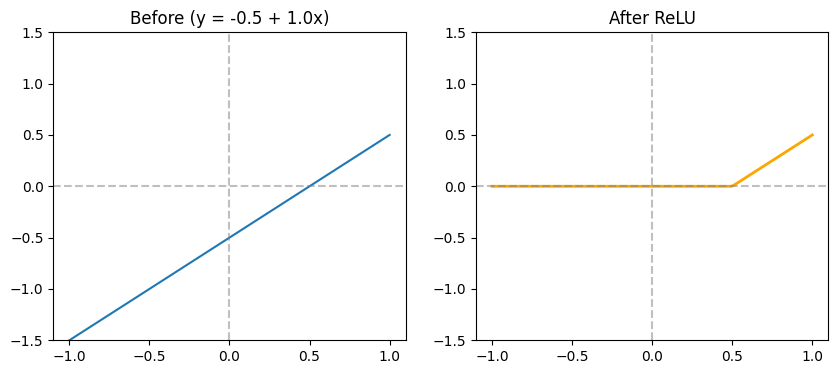

In [17]:
x = np.linspace(-1, 1, 100)

b_0 = -0.5 
b_1 = 1.0  

y = b_0 + b_1 * x

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x, y)
ax[0].axvline(0, ls="--", color='gray', alpha=0.5)
ax[0].axhline(0, ls="--", color='gray', alpha=0.5) 
ax[0].set_title(f"Before (y = {b_0} + {b_1}x)")
ax[0].set_ylim(-1.5, 1.5)

activated_y = ReLU(y)

ax[1].plot(x, activated_y, color='orange', linewidth=2)
ax[1].axvline(0, ls="--", color='gray', alpha=0.5)
ax[1].axhline(0, ls="--", color='gray', alpha=0.5)
ax[1].set_title("After ReLU")
ax[1].set_ylim(-1.5, 1.5)

plt.show()

**Derivative of ReLU:**

The derivative of the ReLU function is effectively the Heaviside Step Function.Mathematically, since $\text{ReLU}(z) = \max(0, z)$, the derivative is defined piecewise:$$f'(z) = \begin{cases} 
1 & \text{if } z > 0 \\
0 & \text{if } z < 0 
\end{cases}$$The Edge Case: What about $z = 0$? 
Mathematically, the derivative at exactly $z = 0$ is undefined.This is because the function has a sharp "corner" (a kink) at 0.The slope coming from the left is 0.The slope coming from the right is 1.

---

2. **Sigmoid**

This is another activation function:
$$g(z) = \frac{1}{1 + e^{-z}}$$
It squashes any real number into a range between 0 and 1. Used in older networks and for logistic regression.

In [18]:
def sigmoid(z: np.ndarray):
  return 1 / (1 + np.exp(-z))

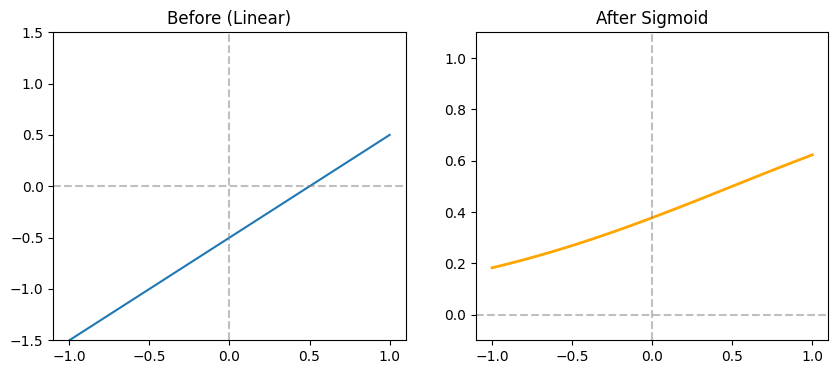

In [22]:
x = np.linspace(-1, 1, 100)

b_0 = -0.5 
b_1 = 1.0  

y = b_0 + b_1 * x

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x, y)
ax[0].axvline(0, ls="--", color='gray', alpha=0.5)
ax[0].axhline(0, ls="--", color='gray', alpha=0.5) 
ax[0].set_title(f"Before (Linear)")
ax[0].set_ylim(-1.5, 1.5)

activated_y = sigmoid(y)

ax[1].plot(x, activated_y, color='orange', linewidth=2)
ax[1].axvline(0, ls="--", color='gray', alpha=0.5)
ax[1].axhline(0, ls="--", color='gray', alpha=0.5)
ax[1].set_title("After Sigmoid")
ax[1].set_ylim(-0.1, 1.1) 

plt.show()

**Derivative of sigmoid:**

$$\sigma(z) = \frac{1}{1 + e^{-z}} = (1 + e^{-z})^{-1}$$

*Apply the Chain Rule*

Using the Power Rule combined with the Chain Rule:
$$\frac{d}{dz}(1 + e^{-z})^{-1} = -1 \cdot (1 + e^{-z})^{-2} \cdot \frac{d}{dz}(1 + e^{-z})$$

The derivative of the inside term $(1 + e^{-z})$ is $-e^{-z}$. So:
$$= -(1 + e^{-z})^{-2} \cdot (-e^{-z})$$
$$= \frac{e^{-z}}{(1 + e^{-z})^2}$$

*The "Magic" Simplification*

Now we want to rewrite this in terms of $\sigma(z)$. We can split the fraction into two parts:

$$\frac{e^{-z}}{(1 + e^{-z})^2} = \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}}$$

We immediately recognize the first part is $\sigma(z)$:
$$= \sigma(z) \cdot \frac{e^{-z}}{1 + e^{-z}}$$

Now, look at the second part. We can use a trick by adding $+1 - 1$ to the numerator:
$$\frac{e^{-z}}{1 + e^{-z}} = \frac{(1 + e^{-z}) - 1}{1 + e^{-z}}$$
$$= \frac{1 + e^{-z}}{1 + e^{-z}} - \frac{1}{1 + e^{-z}}$$
$$= 1 - \sigma(z)$$

*Final Result*

Substitute that back in, and you get:
$$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$$



----

3. **Softmax**

This activation function is used for multiclass tasks. For example, if the $D_o$ = 3, neural network probably produce some numbers that are not probabilities.

But as we have classification task, we want to get probabilities for certain class, such that sum of them will be zero. For this we use the followinf formula:

For each class $k$:
$$\text{softmax}_k[\mathbf{z}] = \frac{e^{z_k}}{\sum_{k'=1}^{K} e^{z_{k'}}}$$
So:
- $e^{z_k}$ ensures each value is positive
- dividing by the sum ensures they sum to 1


In [24]:
def softmax(z: np.ndarray):
  exp_z = np.exp(z)
  
  return exp_z / np.sum(exp_z)

In [25]:
outputs = np.array([3, 2, -4, 0.3, 7])

probs = softmax(outputs)

print("values: ", outputs)
print("probs: ", probs)
print("sum of probs: ", np.sum(probs))

values:  [ 3.   2.  -4.   0.3  7. ]
probs:  [1.78462608e-02 6.56527246e-03 1.62736834e-05 1.19936711e-03
 9.74372826e-01]
sum of probs:  0.9999999999999999


**Softmax Derivative**

*Do We Need the Softmax Derivative?*

*Yes*, conceptually we need it for backpropagation in multiclass classification tasks (e.g., a 3-class spiral dataset). However, in practice, we do **not** implement a separate `softmax_derivative` function like we do for ReLU or Sigmoid. Instead, it is combined with the Cross-Entropy loss derivative for computational efficiency.

*Why We Need It (Conceptually)*

* **Chain Rule in Backpropagation:**
    During the backward pass, we compute gradients layer-by-layer using the chain rule. For any activation function $a(\cdot)$, the gradient with respect to the pre-activation $Z$ is calculated as:
    $$dZ = dA \times a'(Z)$$
    Where $dA$ is the incoming gradient from the loss or the next layer.

* **The Role of Softmax:**
    Softmax turns logits $Z$ into probabilities $\hat{y} = \text{softmax}(Z)$, ensuring they sum to $1$. For Multiclass Cross-Entropy Loss, the formula is:
    $$L = -\frac{1}{N} \sum_i \sum_c y_{ic} \log(\hat{y}_{ic})$$
    The gradient of $L$ with respect to the prediction $\hat{y}$ is $d\hat{y} = -\frac{y}{\hat{y}}$ (per sample, averaged).

* **The Full Chain (The Jacobian):**
    To get the final gradient $dZ$, we theoretically need the **Jacobian matrix** of the Softmax function (since the output of one neuron depends on the sum of all others): $\frac{\partial \hat{y}}{\partial Z}$.
    This results in a matrix where:
    * **Diagonal elements:** $\hat{y}_k (1 - \hat{y}_k)$
    * **Off-diagonal elements:** $-\hat{y}_k \hat{y}_j$

    

* **Consequence:**
    Without this derivative logic, gradients cannot propagate through the output layer back to the hidden layers, making training impossible.

*Why We Don't Need a Separate Function*

* **Simplified Gradient (Softmax + Cross-Entropy):**
    When you combine Softmax and Cross-Entropy into a single computational block, the messy calculus (the Jacobian and the $1/\hat{y}$ terms) cancels out beautifully. The combined derivative becomes:

    $$dZ = \hat{y} - y$$

    Where:
    * $\hat{y} = \text{softmax}(Z)$ (Your model's prediction)
    * $y$ is the one-hot encoded true label.

    **Benefit:** This avoids the computationally expensive step of calculating the full Jacobian matrix explicitly.